In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import scipy
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [2]:
import numpy as np
import os
import pandas as pd

In [3]:
dataframe = pd.read_csv("values/labels.txt", delim_whitespace=True)

In [4]:
dataframe

,filename,category
0,0.png,0
1,1.png,1
2,2.png,2
3,3.png,3
4,4.png,4
5,5.png,5
6,6.png,6
7,7.png,7
8,8.png,8
9,9.png,9


In [5]:
canvas_size = (17, 22)

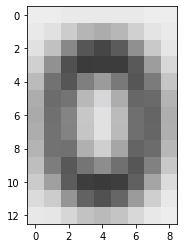

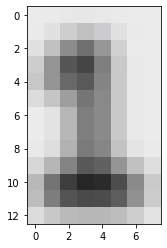

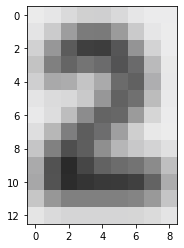

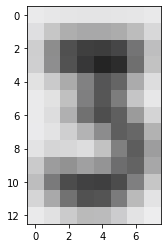

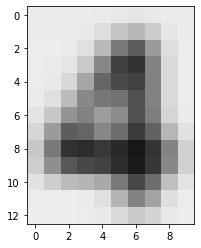

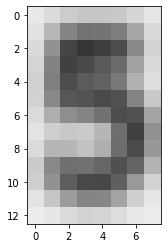

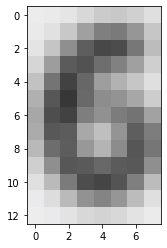

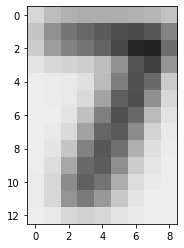

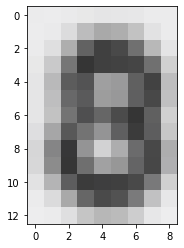

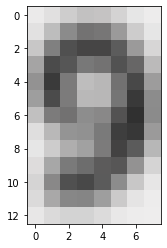

In [45]:
digits = []
for i, row in dataframe.iterrows():
    filename = row.get('filename')
    digit = row.get('category')
    image = cv2.imread(f"values/{filename}")
    plt.imshow(image)
    plt.show()
    digits.append(image)

In [12]:
# BGR
background_colour = (235, 235, 235)

In [46]:
for digit in digits:
    print(digit.shape)

(13, 9, 3)
(13, 8, 3)
(13, 9, 3)
(13, 8, 3)
(13, 10, 3)
(13, 8, 3)
(13, 8, 3)
(13, 9, 3)
(13, 9, 3)
(13, 8, 3)


In [73]:
def create_two_digit(n, x_spacing=0, y_offset=2):
    canvas = np.full(canvas_size+(3,), background_colour)
    
    n_left = n //10
    n_right = n - (n_left*10)
    
    digit_left = digits[n_left]
    digit_right = digits[n_right]
    
    # width is 19 or 20
    # target size is 22
    # padding of 1 or 2
    # choose 2
    width = digit_left.shape[1] + digit_right.shape[1] + x_spacing
    x_offset = (canvas.shape[1]-width)//2
    
    x_right = x_offset+digit_left.shape[1]
    canvas[y_offset:y_offset+digit_left.shape[0], x_offset:x_right] = digit_left
    canvas[y_offset:y_offset+digit_right.shape[0], x_spacing+x_right:x_spacing+x_right+digit_right.shape[1]] = digit_right
    
    return canvas

In [92]:
save_dir = "value_samples"
save_dir_labels = f"{save_dir}/labels.txt"
headers = ["filename", "total_digits", "left_digit", "right_digit"]

In [101]:
def generate_samples():
    for i in range(100):
        for x_pad in range(3):
            for y_off in range(5):
                sample = create_two_digit(i, x_pad, y_off)
                left_digit = i//10
                right_digit = i - (left_digit*10)
                yield (sample, (2, left_digit, right_digit))

In [113]:
def save_samples(samples, override=False):
    mode = "w" if not os.path.exists(save_dir_labels) or override else "a"
    write_header = override or not os.path.exists(save_dir_labels)
    with open(f"{save_dir}/labels.txt", mode) as f:
        if write_header:
            f.write(" ".join(headers)+"\n")

        i = 0
        for sample, labels in samples:
            filename = f"{save_dir}/sample_{i}.png"

            while os.path.exists(filename):
                i += 1
                filename = f"{save_dir}/sample_{i}.png"

            cv2.imwrite(filename, sample)
            labels_str = " ".join(map(str, labels))
            f.write(f"{filename} {labels_str}\n")

In [103]:
def create_one_digit(n):
    digit = digits[n]
    
    x_offset = canvas_size[1]-digit.shape[1]
    y_offset = canvas_size[0]-digit.shape[0]
    
    for x_off in range(x_offset+1):
        for y_off in range(y_offset+1):
            canvas = np.full(canvas_size+(3,), background_colour)
            canvas[y_off:y_off+digit.shape[0], x_off:x_off+digit.shape[1]] = digit
            yield canvas

In [115]:
def generate_single_digits():
    for i in range(0, 10):
        for sample in create_one_digit(i):
            yield (sample, (1, 0, i))

In [116]:
save_samples(generate_single_digits())